In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df = pd.read_csv('BTP_4.csv')

In [4]:
df.sample(5)

,Surface Tension,Contact Angle,viscosity,TA,AW,TL,FL
34,29.09,23.40,7.10,62.67,27.20,21.04,16.14
219,26.20,18.31,12.30,96.00,38.57,27.10,22.40
23,24.48,18.31,15.45,69.10,31.20,15.70,10.92
81,30.64,25.96,2.30,23.70,19.76,5.00,1.69
247,25.20,22.30,15.64,70.30,33.00,23.00,17.22


In [3]:
features_input = np.array(['Surface Tension','Contact Angle','viscosity'])
features_output = np.array(['TA','AW','TL','FL'])

### Random Forest Regression

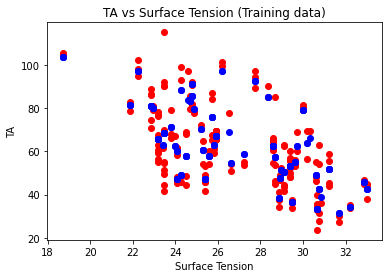

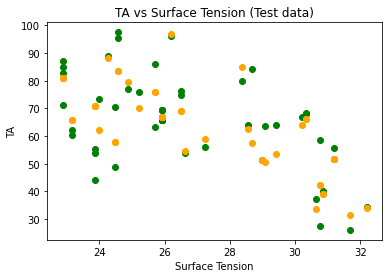

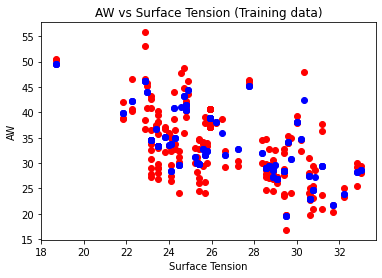

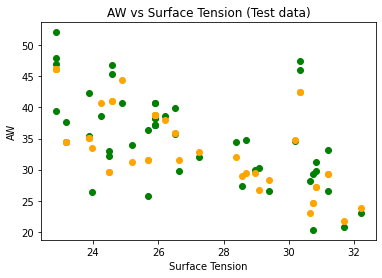

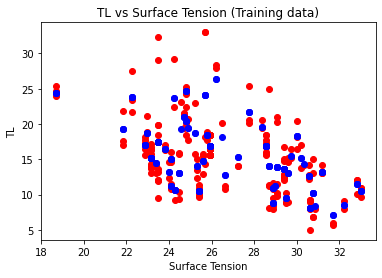

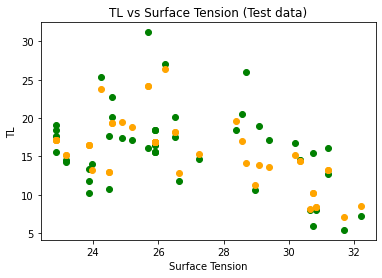

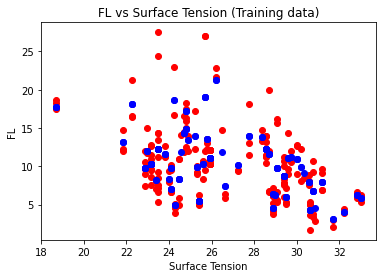

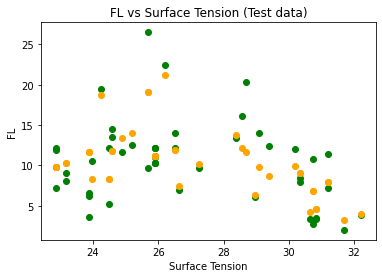

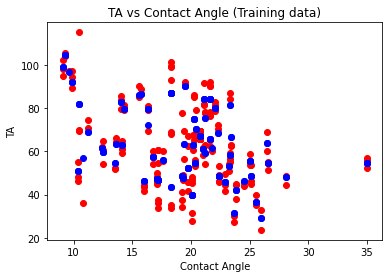

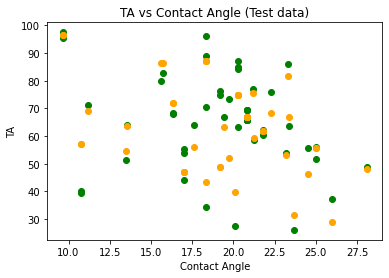

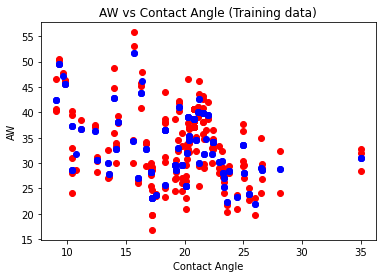

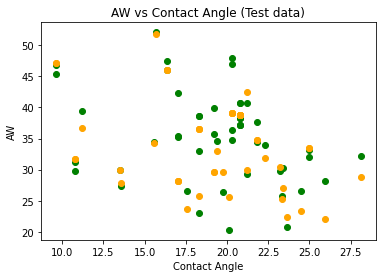

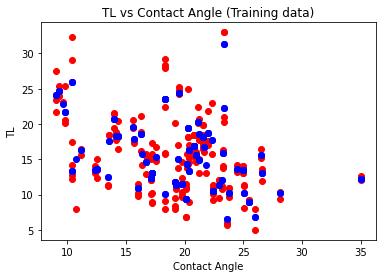

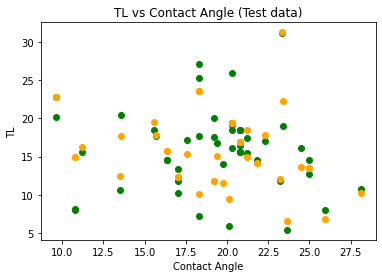

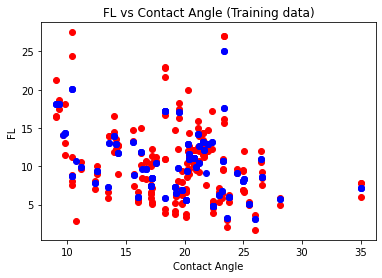

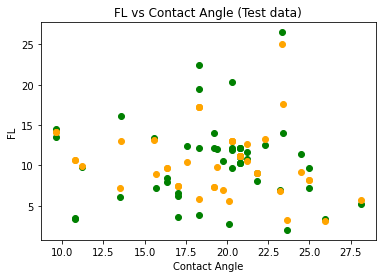

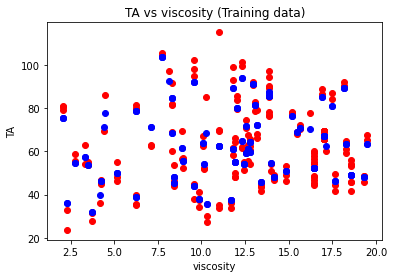

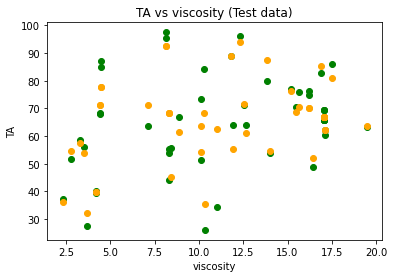

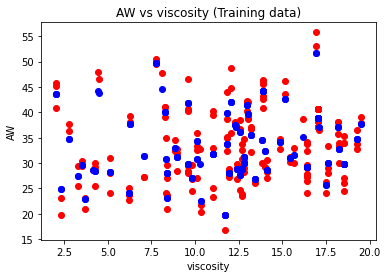

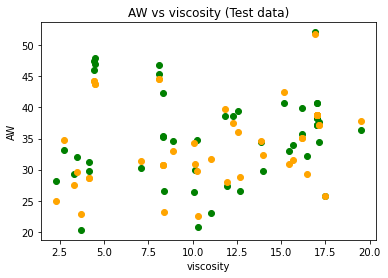

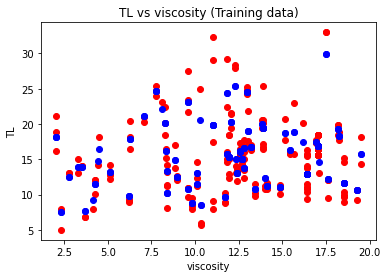

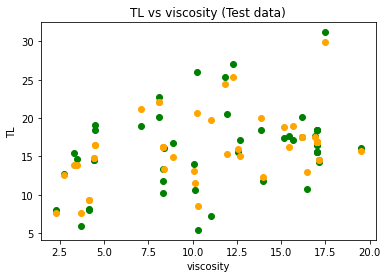

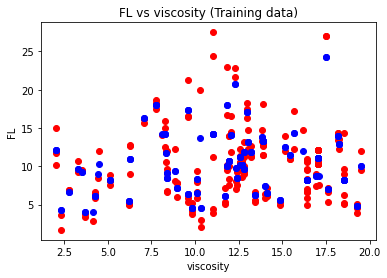

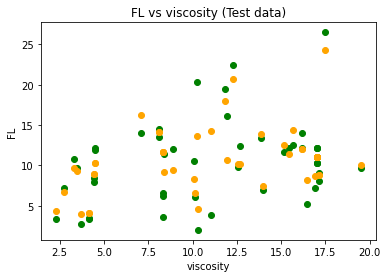

In [14]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        model = RandomForestRegressor(n_estimators=100)
        

        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])
        x_test_scat = pd.DataFrame()
        y_test_scat = pd.Series(dtype='float64')
        y_test_plot = np.array([])

        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train
                x_test_scat = x_test
                y_test_scat = y_test
                y_test_plot = y_pred


        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue')
        plt.title(y+' vs '+x+' (Training data)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

        plt.scatter(x_test_scat,y_test_scat,color='green')
        plt.scatter(x_test_scat,y_test_plot,color='orange')
        plt.title(y+' vs '+x+' (Test data)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()
        
        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [15]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,111.646363,7.415825,10.439082,0.651064
1,Surface Tension vs AW,16.950703,3.182674,4.101551,0.670597
2,Surface Tension vs TL,13.352867,2.536191,3.623705,0.507331
3,Surface Tension vs FL,12.093473,2.376403,3.458913,0.441370
4,Contact Angle vs TA,87.456516,6.595628,9.334303,0.719460
5,Contact Angle vs AW,15.169234,2.913998,3.885257,0.707491
6,Contact Angle vs TL,8.359227,2.120145,2.876902,0.689029
7,Contact Angle vs FL,7.434486,1.958780,2.709872,0.659510
8,viscosity vs TA,118.635750,6.983920,10.475403,0.622196
9,viscosity vs AW,16.463287,2.947148,4.011772,0.685755
